In [1]:
# Import Libraries

import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Creating dataframes for spotify charts for the countries below

df_india = pd.read_csv ('/Users/aayushmakharia/Desktop/untitled folder 2/india.csv')
df_unitedstates = pd.read_csv ('/Users/aayushmakharia/Desktop/untitled folder 2/united_states.csv')
df_unitedkingdom = pd.read_csv ('/Users/aayushmakharia/Desktop/untitled folder 2/united_kingdom.csv')

In [3]:
# Dataframe of India

df_india.head(5)
df_india["Streams"] = df_india["Streams"].str.replace(',', '').astype(float)

In [4]:
# Dataframe of United States

df_unitedstates.head(5)

Song       Artist    Date    Streams  Rank Country  \
0                     The Box  Roddy Ricch  3/1/20  2,145,340     1      us   
1                      Say So     Doja Cat  3/1/20  1,116,529     2      us   
2             Blinding Lights   The Weeknd  3/1/20  1,106,280     3      us   
3  Life Is Good (feat. Drake)       Future  3/1/20  1,048,449     4      us   
4             Blueberry Faygo    Lil Mosey  3/1/20  1,043,040     5      us   

                                               Links  Danceability  Energy  \
0  https://open.spotify.com/track/0nbXyq5TXYPCO7p...         0.896   0.586   
1  https://open.spotify.com/track/3Dv1eDb0MEgF93G...         0.787   0.673   
2  https://open.spotify.com/track/0sf12qNH5qcw8qp...         0.513   0.796   
3  https://open.spotify.com/track/5yY9lUy8nbvjM1U...         0.676   0.609   
4  https://open.spotify.com/track/22LAwLoDA5b4AaG...         0.774   0.554   

   Loudness  Speechiness  Acousticness  Instrumentalness  Liveness  Valence  \
0    -6.687       0.0559       0.10400          0.000000    0.7900    0.642   
1    -4.577       0.1580       0.25600          0.000004    0.0904    0.786   
2    -4.075       0.0629       0.00147          0.000209    0.0938    0.345   
3    -5.831       0.4810       0.07060          0.000000    0.1520    0.508   
4    -7.909       0.0383       0.20700          0.000000    0.1320    0.349   

     Tempo                                              Genre  
0  116.971                     ['melodic rap', 'rap', 'trap']  
1  110.962                    ['dance pop', 'pop', 'pop rap']  
2  171.017  ['canadian contemporary r&b', 'canadian pop', ...  
3  142.037  ['atl hip hop', 'pop rap', 'rap', 'southern hi...  
4   99.034  ['melodic rap', 'rap', 'rap conscient', 'trap'...

In [5]:
# Dataframe of United Kingdom

df_unitedkingdom.head(5)

Song         Artist    Date  Streams  Rank Country  \
0        Blinding Lights     The Weeknd  3/1/20  439,557     1      gb   
1                The Box    Roddy Ricch  3/1/20  401,034     2      gb   
2  Roses - Imanbek Remix      SAINt JHN  3/1/20  342,579     3      gb   
3         No Time To Die  Billie Eilish  3/1/20  309,990     4      gb   
4        Don't Start Now       Dua Lipa  3/1/20  292,161     5      gb   

                                               Links  Danceability  Energy  \
0  https://open.spotify.com/track/0sf12qNH5qcw8qp...         0.513   0.796   
1  https://open.spotify.com/track/0nbXyq5TXYPCO7p...         0.896   0.586   
2  https://open.spotify.com/track/24Yi9hE78yPEbZ4...         0.770   0.724   
3  https://open.spotify.com/track/73SpzrcaHk0RQPF...         0.380   0.219   
4  https://open.spotify.com/track/6WrI0LAC5M1Rw2M...         0.794   0.793   

   Loudness  Speechiness  Acousticness  Instrumentalness  Liveness  Valence  \
0    -4.075       0.0629       0.00147          0.000209    0.0938   0.3450   
1    -6.687       0.0559       0.10400          0.000000    0.7900   0.6420   
2    -5.484       0.0495       0.01670          0.010700    0.3530   0.8980   
3   -13.273       0.0358       0.91700          0.010400    0.0827   0.0517   
4    -4.521       0.0842       0.01250          0.000000    0.0952   0.6770   

     Tempo                                              Genre  
0  171.017  ['canadian contemporary r&b', 'canadian pop', ...  
1  116.971                     ['melodic rap', 'rap', 'trap']  
2  121.975               ['melodic rap', 'rap', 'slap house']  
3   73.537                              ['electropop', 'pop']  
4  123.941                     ['dance pop', 'pop', 'uk pop']

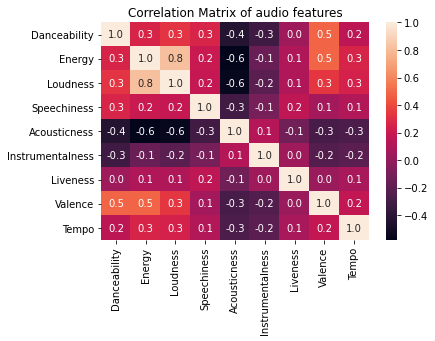

In [6]:
# Correlation matrix of audio features of the songs collected
# Strength of linear association between audio features

df_temp = df_india.append(df_unitedstates).reset_index(drop=True)
df_combined = df_temp.append(df_unitedkingdom).reset_index(drop=True)
df_combined.drop_duplicates(subset=["Song"], inplace=True)

df_audio = df_combined[['Danceability', 'Energy', 'Loudness', 
                        'Speechiness', 'Acousticness',
                        'Instrumentalness', 'Liveness', 'Valence', 'Tempo']]

df_audio.corr()
sn.heatmap(df_audio.corr(), annot=True, fmt=".1f")
plt.title('Correlation Matrix of audio features')
plt.show()

In [7]:
# Lockdown phase in India 
# Music analysis

df_india['Date'] = pd.to_datetime(df_india['Date'])

start_date = '03-25-20'
end_date = '05-21-20'

date_mask = (df_india['Date'] >= start_date) & (df_india['Date'] <= end_date)

df_india_lockdown = df_india.loc[date_mask]


Song
Stuck with U (with Justin Bieber)    130875.0
Shayad                               126926.0
Genda Phool (feat. Payal Dev)        126076.0
death bed (coffee for your head)     121315.0
Intentions (feat. Quavo)             113817.0
Falling                              112874.0
Blinding Lights                      103233.0
Skechers                             102012.0
Illegal Weapon 2.0                    94470.0
Roses - Imanbek Remix                 91442.0
Name: Streams, dtype: float64


<ipython-input-8-6a8258041998>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_india_temp.drop_duplicates(subset = ["Song"], inplace=True)


<AxesSubplot:title={'center':'Top 10 Streamed Songs in India during the Lockdown Phase'}, xlabel='Streams in Millions', ylabel='Song'>

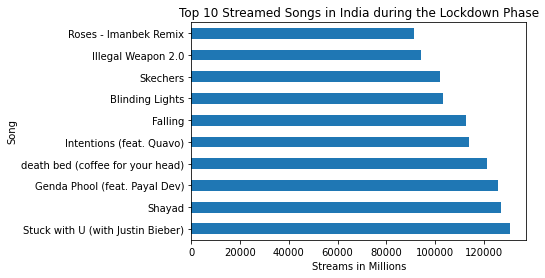

In [8]:
# Top 10 Streamed Songs in India during the lockdown

df_india_temp = df_india_lockdown
df_india_temp.drop_duplicates(subset = ["Song"], inplace=True)
df_stream_india = df_india_temp.groupby(['Song'])['Streams'].sum().nlargest(10)

print(df_stream_india)

plt.title("Top 10 Streamed Songs in India during the Lockdown Phase")
plt.ylabel("Song")
plt.xlabel("Streams in Millions")
df_stream_india.plot.barh()


In [9]:
# Analysing the above songs

df_audio_valence = df_india_temp[['Song','Streams','Valence', 'Genre', 'Artist']]

df_audio_valence['Sentiment'] = df_audio_valence['Valence'].map(lambda x:'Sad' if x<0.4 else 'Happy')
df_audio_valence

<ipython-input-9-2b4a2af904cf>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_audio_valence['Sentiment'] = df_audio_valence['Valence'].map(lambda x:'Sad' if x<0.4 else 'Happy')


Song   Streams  Valence  \
120                             Shayad  126926.0    0.319   
121           Intentions (feat. Quavo)  113817.0    0.874   
122                            Falling  112874.0    0.236   
123                    Blinding Lights  103233.0    0.334   
124                 Illegal Weapon 2.0   94470.0    0.494   
131      Genda Phool (feat. Payal Dev)  126076.0    0.837   
187   death bed (coffee for your head)  121315.0    0.348   
199                           Skechers  102012.0    0.274   
299                       Toosie Slide   89118.0    0.837   
304              Ghungroo (From "War")   85925.0    0.864   
333              Roses - Imanbek Remix   91442.0    0.898   
340  Stuck with U (with Justin Bieber)  130875.0    0.537   
364                          Play Date   90332.0    0.446   

                                                 Genre  \
120  ['desi pop', 'filmi', 'indian instrumental', '...   
121           ['canadian pop', 'pop', 'post-teen pop']   
122                           ['pop', 'post-teen pop']   
123  ['canadian contemporary r&b', 'canadian pop', ...   
124                        ['desi pop', 'punjabi pop']   
131  ['desi hip hop', 'desi pop', 'desi trap', 'fil...   
187                             ['emo rap', 'sad rap']   
199                                      ['viral rap']   
299  ['canadian hip hop', 'canadian pop', 'hip hop'...   
304          ['desi pop', 'filmi', 'modern bollywood']   
333               ['melodic rap', 'rap', 'slap house']   
340                           ['pop', 'post-teen pop']   
364        ['alt z', 'dance pop', 'electropop', 'pop']   

                            Artist Sentiment  
120           Pritam, Arijit Singh       Sad  
121                  Justin Bieber     Happy  
122                  Trevor Daniel       Sad  
123                     The Weeknd       Sad  
124  Jasmine Sandlas, Garry Sandhu     Happy  
131                        Badshah     Happy  
187             Powfu, beabadoobee       Sad  
199                     DripReport       Sad  
299                          Drake     Happy  
304       Arijit Singh, Shilpa Rao     Happy  
333                      SAINt JHN     Happy  
340                  Ariana Grande     Happy  
364               Melanie Martinez     Happy

Average Streams (%) of Sad/Happy songs in Lockdown


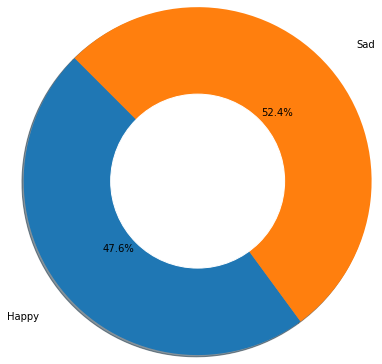

In [10]:
df_stream_india_sent = df_audio_valence.groupby(['Sentiment'])['Streams'].mean()

sent = ['Happy', 'Sad']

print("Average Streams (%) of Sad/Happy songs in Lockdown")
explode = (0.0, 0.0) 
plt.pie(df_stream_india_sent, labels = sent, labeldistance=1.2, explode = explode,autopct='%.1f%%', radius = 2, shadow = True, startangle=135)
my_circle=plt.Circle((0,0), 1, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [11]:
start_date1 = '05-22-20'
end_date1 = '07-31-20'

date_mask1 = (df_india['Date'] >= start_date1) & (df_india['Date'] <= end_date1)
df_india_lockdown1 = df_india.loc[date_mask1]
df_india_lockdown1.head(20)

Song                Artist  \
410                                          Play Date      Melanie Martinez   
411                                             Shayad  Pritam, Arijit Singh   
412                      Genda Phool (feat. Payal Dev)               Badshah   
413                   death bed (coffee for your head)    Powfu, beabadoobee   
414  Malang (Title Track) [From "Malang - Unleash T...            Ved Sharma   
415                                             Shayad  Pritam, Arijit Singh   
416                                          Play Date      Melanie Martinez   
417                      Genda Phool (feat. Payal Dev)               Badshah   
418                   death bed (coffee for your head)    Powfu, beabadoobee   
419  Malang (Title Track) [From "Malang - Unleash T...            Ved Sharma   
420                                             Shayad  Pritam, Arijit Singh   
421                                          Play Date      Melanie Martinez   
422                      Genda Phool (feat. Payal Dev)               Badshah   
423                   death bed (coffee for your head)    Powfu, beabadoobee   
424  Malang (Title Track) [From "Malang - Unleash T...            Ved Sharma   
425                                             Shayad  Pritam, Arijit Singh   
426                                          Play Date      Melanie Martinez   
427                      Genda Phool (feat. Payal Dev)               Badshah   
428                   death bed (coffee for your head)    Powfu, beabadoobee   
429                              Roses - Imanbek Remix             SAINt JHN   

          Date   Streams  Rank Country  \
410 2020-05-22  120310.0     1      in   
411 2020-05-22  120270.0     2      in   
412 2020-05-22   98518.0     3      in   
413 2020-05-22   94791.0     4      in   
414 2020-05-22   83301.0     5      in   
415 2020-05-23  122896.0     1      in   
416 2020-05-23  119198.0     2      in   
417 2020-05-23  100953.0     3      in   
418 2020-05-23   95074.0     4      in   
419 2020-05-23   84050.0     5      in   
420 2020-05-24  119553.0     1      in   
421 2020-05-24  115879.0     2      in   
422 2020-05-24   97037.0     3      in   
423 2020-05-24   92872.0     4      in   
424 2020-05-24   81171.0     5      in   
425 2020-05-25  120411.0     1      in   
426 2020-05-25  116984.0     2      in   
427 2020-05-25   97206.0     3      in   
428 2020-05-25   93718.0     4      in   
429 2020-05-25   82992.0     5      in   

                                                 Links  Danceability  Energy  \
410  https://open.spotify.com/track/4DpNNXFMMxQEKl7...         0.680   0.729   
411  https://open.spotify.com/track/1smFN2CLqGROu0J...         0.483   0.468   
412  https://open.spotify.com/track/0gzu5mm36VJH2Zq...         0.955   0.538   
413  https://open.spotify.com/track/7eJMfftS33KTjuF...         0.726   0.431   
414  https://open.spotify.com/track/25MPTnqXQB1H6Ok...         0.384   0.728   
415  https://open.spotify.com/track/1smFN2CLqGROu0J...         0.483   0.468   
416  https://open.spotify.com/track/4DpNNXFMMxQEKl7...         0.680   0.729   
417  https://open.spotify.com/track/0gzu5mm36VJH2Zq...         0.955   0.538   
418  https://open.spotify.com/track/7eJMfftS33KTjuF...         0.726   0.431   
419  https://open.spotify.com/track/25MPTnqXQB1H6Ok...         0.384   0.728   
420  https://open.spotify.com/track/1smFN2CLqGROu0J...         0.483   0.468   
421  https://open.spotify.com/track/4DpNNXFMMxQEKl7...         0.680   0.729   
422  https://open.spotify.com/track/0gzu5mm36VJH2Zq...         0.955   0.538   
423  https://open.spotify.com/track/7eJMfftS33KTjuF...         0.726   0.431   
424  https://open.spotify.com/track/25MPTnqXQB1H6Ok...         0.384   0.728   
425  https://open.spotify.com/track/1smFN2CLqGROu0J...         0.483   0.468   
426  https://open.spotify.com/track/4DpNNXFMMxQEKl7...         0.680   0.729   
427  https://open.spotify.com/track/0gzu5mm36V

<ipython-input-12-f0045ae97ad0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_india_temp1.drop_duplicates(subset = ["Song"], inplace=True)


Song
Main Tumhara         334609.0
G.O.A.T.             229092.0
Taare Ginn           174167.0
Khulke Jeene Ka      148485.0
Stay Gold            145139.0
How You Like That    138881.0
Clash                129592.0
Play Date            120310.0
Shayad               120270.0
Dil Bechara          113731.0
Name: Streams, dtype: float64


<AxesSubplot:title={'center':'Top 10 Streamed Songs in India during the Post-Lockdown Phase'}, xlabel='Streams in Millions', ylabel='Song'>

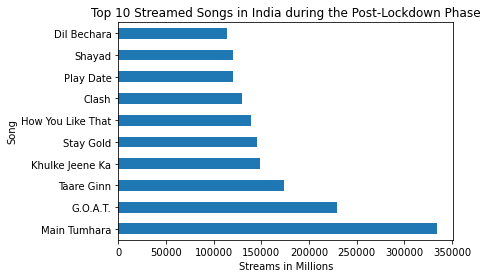

In [12]:
df_india_temp1 = df_india_lockdown1
df_india_temp1.drop_duplicates(subset = ["Song"], inplace=True)
df_stream_india1 = df_india_temp1.groupby(['Song'])['Streams'].sum().nlargest(10)

print(df_stream_india1)

plt.title("Top 10 Streamed Songs in India during the Post-Lockdown Phase")
plt.ylabel("Song")
plt.xlabel("Streams in Millions")
df_stream_india1.plot.barh()


In [13]:
df_audio_valence1 = df_india_temp1[['Song','Streams','Valence', 'Genre', 'Artist']]
df_audio_valence1['Sentiment'] = df_audio_valence1['Valence'].map(lambda x:'Sad' if x<0.4 else 'Happy')
df_audio_valence1

<ipython-input-13-88003de4817a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_audio_valence1['Sentiment'] = df_audio_valence1['Valence'].map(lambda x:'Sad' if x<0.4 else 'Happy')


Song   Streams  Valence  \
410                                          Play Date  120310.0    0.446   
411                                             Shayad  120270.0    0.319   
412                      Genda Phool (feat. Payal Dev)   98518.0    0.837   
413                   death bed (coffee for your head)   94791.0    0.348   
414  Malang (Title Track) [From "Malang - Unleash T...   83301.0    0.311   
429                              Roses - Imanbek Remix   82992.0    0.898   
439                                            Falling   84634.0    0.236   
449       Tujhe Kitna Chahne Lage (From "Kabir Singh")   87022.0    0.306   
517                                       Bambiha Bole  105517.0    0.685   
528                                          Khairiyat   93787.0    0.293   
544                                             Makhna   87124.0    0.426   
550                                          Stay Gold  145139.0    0.548   
588                   Savage Love (Laxed - Siren Beat)   94523.0    0.761   
590                                  How You Like That  138881.0    0.351   
684                                     Your eyes tell  100122.0    0.258   
728                                        Dil Bechara  113731.0    0.747   
729                                           cardigan  112840.0    0.551   
730                                       Main Tumhara  334609.0    0.123   
732                                         Taare Ginn  174167.0    0.358   
733                                    Khulke Jeene Ka  148485.0    0.533   
755                                           G.O.A.T.  229092.0    0.686   
757                                              Clash  129592.0    0.688   

                                                 Genre  \
410        ['alt z', 'dance pop', 'electropop', 'pop']   
411  ['desi pop', 'filmi', 'indian instrumental', '...   
412  ['desi hip hop', 'desi pop', 'desi trap', 'fil...   
413                             ['emo rap', 'sad rap']   
414                                       ['desi pop']   
429               ['melodic rap', 'rap', 'slap house']   
439                           ['pop', 'post-teen pop']   
449          ['desi pop', 'filmi', 'modern bollywood']   
517                        ['desi pop', 'punjabi pop']   
528  ['desi pop', 'filmi', 'indian instrumental', '...   
544          ['desi pop', 'filmi', 'modern bollywood']   
550                       ['k-pop', 'k-pop boy group']   
588                                         ['nz pop']   
590                      ['k-pop', 'k-pop girl group']   
684                       ['k-pop', 'k-pop boy group']   
728  ['desi pop', 'filmi', 'modern bollywood', 'sufi']   
729                           ['pop', 'post-teen pop']   
730  ['desi pop', 'filmi', 'modern bollywood', 'sufi']   
732  ['desi pop', 'filmi', 'modern bollywood', 'sufi']   
733  ['desi pop', 'filmi', 'modern bollywood', 'sufi']   
755  ['pop', 'pop r&b', 'pop rap', 'r&b', 'rap', 'u...   
757                                     ['vapor trap']   

                                          Artist Sentiment  
410                             Melanie Martinez     Happy  
411                         Pritam, Arijit Singh       Sad  
412                                      Badshah     Happy  
413                           Powfu, beabadoobee       Sad  
414                                   Ved Sharma       Sad  
429                                    SAINt JHN     Happy  
439                                Trevor Daniel       Sad  
449                        Arijit Singh, Mithoon       Sad  
517                  Sidhu Moose Wala,Amrit Maan     Happy  
528                         Pritam, Arijit Singh       Sad  
544     Tanishk Bagchi, Yasser Desai, Asees Kaur     Happy  
550                                          BTS     Happy  
588                      Jawsh 685, Jason Derulo     Happy  
590                                    BLACKPINK       Sad  
684                         

Average Streams (%) of Sad/Happy songs Post-Lockdown


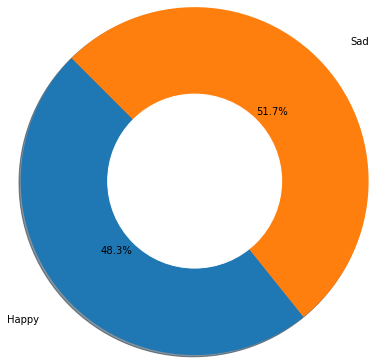

In [14]:
df_stream_india_sent1 = df_audio_valence1.groupby(['Sentiment'])['Streams'].mean()

sent1 = ['Happy', 'Sad']

print("Average Streams (%) of Sad/Happy songs Post-Lockdown")
explode = (0.0, 0.0) 
plt.pie(df_stream_india_sent1, labels = sent1, labeldistance=1.2, explode = explode,autopct='%.1f%%', radius = 2, shadow = True, startangle=135)
my_circle=plt.Circle((0,0), 1, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [15]:
start_date2 = '03-25-20'
end_date2 = '05-21-20'

date_mask2 = (df_india['Date'] >= start_date2) & (df_india['Date'] <= end_date2)
df_india_lockdown2 = df_india.loc[date_mask2]

In [16]:
df_india_lockdown2.drop_duplicates(subset = ["Song"], inplace=True)

df_audio_valence2 = df_india_lockdown2[['Song','Streams','Valence', 'Genre', 'Artist']]
df_audio_valence2['Sentiment'] = df_audio_valence2['Valence'].map(lambda x:'Sad' if x<0.4 else 'Happy')

df_happy = df_audio_valence2.loc[df_audio_valence2['Sentiment'] == 'Happy']
df_sad = df_audio_valence2.loc[df_audio_valence2['Sentiment'] == 'Sad']

<ipython-input-16-ae5b5664cc26>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_india_lockdown2.drop_duplicates(subset = ["Song"], inplace=True)
<ipython-input-16-ae5b5664cc26>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_audio_valence2['Sentiment'] = df_audio_valence2['Valence'].map(lambda x:'Sad' if x<0.4 else 'Happy')


Artist with Highest Sad Stream vs Artist with Highest Happy Stream Lockdown


<AxesSubplot:xlabel='Artist', ylabel='Streams'>

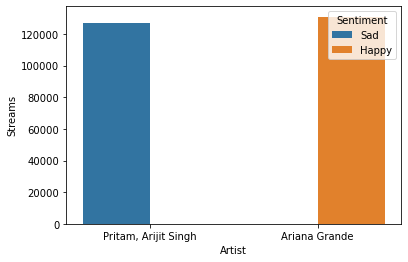

In [17]:

df_sadplt = df_sad.sort_values(by = 'Streams', ascending = False).head(1)
df_happyplt = df_happy.sort_values(by = 'Streams', ascending = False).head(1)
print("Artist with Highest Sad Stream vs Artist with Highest Happy Stream Lockdown")
result = df_sadplt.append(df_happyplt).reset_index(drop=True)
result["Artist"]
sns.barplot(x="Artist", y="Streams", data=result, hue="Sentiment")

In [18]:
start_date3 = '05-21-20'
end_date3 = '07-31-20'

date_mask3 = (df_india['Date'] >= start_date3) & (df_india['Date'] <= end_date3)
df_india_lockdown3 = df_india.loc[date_mask3]

In [19]:
df_india_lockdown3.drop_duplicates(subset = ["Song"], inplace=True)

df_audio_valence3 = df_india_lockdown3[['Song','Streams','Valence', 'Genre', 'Artist']]
df_audio_valence3['Sentiment'] = df_audio_valence3['Valence'].map(lambda x:'Sad' if x<0.4 else 'Happy')

df_happy1 = df_audio_valence3.loc[df_audio_valence3['Sentiment'] == 'Happy']
df_sad1 = df_audio_valence3.loc[df_audio_valence3['Sentiment'] == 'Sad']

<ipython-input-19-6cba99723941>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_india_lockdown3.drop_duplicates(subset = ["Song"], inplace=True)
<ipython-input-19-6cba99723941>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_audio_valence3['Sentiment'] = df_audio_valence3['Valence'].map(lambda x:'Sad' if x<0.4 else 'Happy')


Artist with Highest Sad Stream vs Artist with Highest Happy Stream Post-Lockdown


<AxesSubplot:xlabel='Artist', ylabel='Streams'>

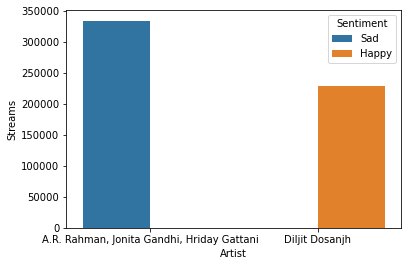

In [20]:

df_sadplt1 = df_sad1.sort_values(by = 'Streams', ascending = False).head(1)
df_happyplt1 = df_happy1.sort_values(by = 'Streams', ascending = False).head(1)
print("Artist with Highest Sad Stream vs Artist with Highest Happy Stream Post-Lockdown")
result1 = df_sadplt1.append(df_happyplt1).reset_index(drop=True)
result1["Artist"]
sns.barplot(x="Artist", y="Streams", data=result1, hue="Sentiment")

In [21]:
# Kmeans

df_india_cluster = df_india.copy()
X = df_india_cluster.iloc[:, [7,8,9,10,11,12,13,14,15]].values

In [22]:
print(X.shape)

(765, 9)


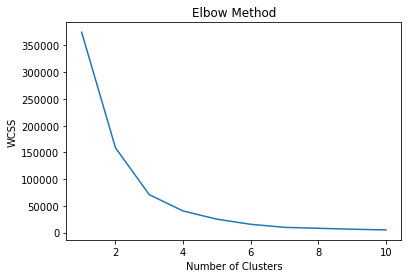

In [23]:
# finding out the proper number of clusters
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 765, n_init = 10, random_state = 0)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [24]:
#Taking 5 clusters

scaleVar = MinMaxScaler()
scaledVar = scaleVar.fit_transform(X)

#Kmeans 5 clusters according to elbow

kmeans = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 765, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(scaledVar)

In [25]:
# pred values 
y_kmeans

array([1, 3, 0, 4, 4, 1, 3, 4, 0, 4, 1, 3, 0, 4, 4, 1, 3, 4, 0, 4, 1, 0,
       3, 4, 4, 1, 0, 4, 3, 4, 1, 0, 3, 4, 4, 1, 0, 3, 4, 4, 1, 0, 3, 4,
       4, 1, 3, 0, 4, 0, 1, 4, 0, 3, 4, 1, 4, 0, 3, 4, 1, 4, 0, 3, 4, 1,
       4, 0, 3, 0, 1, 4, 0, 3, 0, 1, 4, 0, 3, 4, 1, 4, 0, 3, 4, 1, 4, 0,
       3, 4, 4, 1, 0, 3, 0, 1, 4, 4, 0, 3, 1, 4, 0, 4, 3, 1, 4, 0, 4, 3,
       1, 0, 4, 4, 3, 1, 0, 4, 4, 3, 1, 0, 4, 4, 3, 1, 0, 4, 4, 3, 1, 0,
       0, 4, 4, 0, 1, 0, 4, 4, 0, 1, 0, 4, 4, 0, 1, 0, 4, 4, 0, 1, 0, 4,
       4, 0, 1, 0, 4, 4, 0, 1, 4, 0, 4, 0, 1, 4, 4, 3, 0, 1, 4, 4, 3, 0,
       1, 4, 4, 3, 0, 1, 4, 4, 3, 0, 1, 2, 4, 4, 0, 1, 2, 4, 4, 0, 2, 1,
       4, 3, 0, 2, 1, 3, 4, 0, 2, 1, 3, 4, 0, 2, 1, 3, 4, 0, 2, 1, 3, 4,
       0, 2, 1, 3, 4, 0, 2, 1, 3, 4, 0, 2, 1, 3, 4, 0, 2, 1, 3, 4, 0, 2,
       1, 3, 4, 0, 2, 1, 3, 4, 0, 2, 1, 3, 4, 0, 2, 3, 1, 4, 0, 2, 3, 1,
       4, 0, 2, 3, 1, 4, 0, 2, 3, 1, 4, 0, 2, 1, 3, 4, 0, 1, 2, 3, 4, 0,
       1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 4, 0, 0,

In [26]:
# converting preditcions into a df
kmeans = pd.DataFrame(data=y_kmeans, dtype=int)
kmeans.columns = ['K-Means Cluster']

In [27]:
df_india_cluster = pd.concat([df_india_cluster, kmeans], axis=1)
df_india_cluster.head(5)

Song  \
0                                             Shayad   
1                                 Illegal Weapon 2.0   
2                           Intentions (feat. Quavo)   
3                                            Falling   
4  Malang (Title Track) [From "Malang - Unleash T...   

                          Artist       Date   Streams  Rank Country  \
0           Pritam, Arijit Singh 2020-03-01  138415.0     1      in   
1  Jasmine Sandlas, Garry Sandhu 2020-03-01  125234.0     2      in   
2                  Justin Bieber 2020-03-01  122769.0     3      in   
3                  Trevor Daniel 2020-03-01  122465.0     4      in   
4                     Ved Sharma 2020-03-01  120269.0     5      in   

                                               Links  Danceability  Energy  \
0  https://open.spotify.com/track/1smFN2CLqGROu0J...         0.483   0.468   
1  https://open.spotify.com/track/7CY0CmCpSglfUKC...         0.805   0.919   
2  https://open.spotify.com/track/4umIPjkehX1r7uh...         0.806   0.546   
3  https://open.spotify.com/track/4TnjEaWOeW0eKTK...         0.785   0.431   
4  https://open.spotify.com/track/25MPTnqXQB1H6Ok...         0.384   0.728   

   Loudness  Speechiness  Acousticness  Instrumentalness  Liveness  Valence  \
0    -7.642       0.0341         0.785          0.000000    0.1520    0.319   
1    -1.294       0.0938         0.101          0.003430    0.0598    0.494   
2    -6.637       0.0575         0.300          0.000000    0.1020    0.874   
3    -8.756       0.0364         0.123          0.000000    0.0887    0.236   
4    -6.503       0.0623         0.329          0.000018    0.3290    0.311   

     Tempo                                              Genre  K-Means Cluster  
0  135.864  ['desi pop', 'filmi', 'indian instrumental', '...                1  
1   94.993                        ['desi pop', 'punjabi pop']                3  
2  147.986           ['canadian pop', 'pop', 'post-teen pop']                0  
3  127.085                           ['pop', 'post-teen pop']                4  
4  156.396                                       ['desi pop']                4

In [28]:
# Songs in part of cluster 0
df_0_cluster = df_india_cluster.loc[df_india_cluster['K-Means Cluster'] == 0]
df_0_cluster.drop_duplicates(subset=['Song']).head(5)

Song  \
2                             Intentions (feat. Quavo)   
49                               Ghungroo (From "War")   
94   Garmi (From "Street Dancer 3D") (feat. Varun D...   
131                      Genda Phool (feat. Payal Dev)   
299                                       Toosie Slide   

                       Artist       Date   Streams  Rank Country  \
2               Justin Bieber 2020-03-01  122769.0     3      in   
49   Arijit Singh, Shilpa Rao 2020-03-10  101639.0     5      in   
94       Badshah, Neha Kakkar 2020-03-19  101002.0     5      in   
131                   Badshah 2020-03-27  126076.0     2      in   
299                     Drake 2020-04-29   89118.0     5      in   

                                                 Links  Danceability  Energy  \
2    https://open.spotify.com/track/4umIPjkehX1r7uh...         0.806   0.546   
49   https://open.spotify.com/track/0WdbnNKO0Jt4BZA...         0.695   0.727   
94   https://open.spotify.com/track/6q9XTgfWilsnyiF...         0.788   0.870   
131  https://open.spotify.com/track/0gzu5mm36VJH2Zq...         0.955   0.538   
299  https://open.spotify.com/track/127QTOFJsJQp5Lb...         0.834   0.454   

     Loudness  Speechiness  Acousticness  Instrumentalness  Liveness  Valence  \
2      -6.637       0.0575        0.3000          0.000000    0.1020    0.874   
49     -6.274       0.0323        0.0744          0.000175    0.5330    0.864   
94     -5.217       0.1770        0.1230          0.000014    0.0692    0.884   
131    -8.394       0.0734        0.1320          0.001460    0.0704    0.837   
299    -9.750       0.2010        0.3210          0.000006    0.1140    0.837   

       Tempo                                              Genre  \
2    147.986           ['canadian pop', 'pop', 'post-teen pop']   
49   118.034          ['desi pop', 'filmi', 'modern bollywood']   
94   109.974  ['desi hip hop', 'desi pop', 'desi trap', 'fil...   
131  116.977  ['desi hip hop', 'desi pop', 'desi trap', 'fil...   
299   81.618  ['canadian hip hop', 'canadian pop', 'hip hop'...   

     K-Means Cluster  
2                  0  
49                 0  
94                 0  
131                0  
299                0

In [29]:
# Songs in part of cluster 1
df_1_cluster = df_india_cluster.loc[df_india_cluster['K-Means Cluster'] == 1]
df_1_cluster.drop_duplicates(subset=['Song']).head(5)

Song                 Artist  \
0                                          Shayad   Pritam, Arijit Singh   
364                                     Play Date       Melanie Martinez   
449  Tujhe Kitna Chahne Lage (From "Kabir Singh")  Arijit Singh, Mithoon   
528                                     Khairiyat   Pritam, Arijit Singh   
729                                      cardigan           Taylor Swift   

          Date   Streams  Rank Country  \
0   2020-03-01  138415.0     1      in   
364 2020-05-12   90332.0     5      in   
449 2020-05-29   87022.0     5      in   
528 2020-06-14   93787.0     4      in   
729 2020-07-24  112840.0     5      in   

                                                 Links  Danceability  Energy  \
0    https://open.spotify.com/track/1smFN2CLqGROu0J...         0.483   0.468   
364  https://open.spotify.com/track/4DpNNXFMMxQEKl7...         0.680   0.729   
449  https://open.spotify.com/track/2Fv2injs4qAm8mJ...         0.427   0.396   
528  https://open.spotify.com/track/5O932cZmzOZGOGZ...         0.534   0.481   
729  https://open.spotify.com/track/4LEK9rD7TWIG4FC...         0.613   0.581   

     Loudness  Speechiness  Acousticness  Instrumentalness  Liveness  Valence  \
0      -7.642       0.0341         0.785          0.000000     0.152    0.319   
364    -5.077       0.0475         0.612          0.000000     0.224    0.446   
449    -7.556       0.0366         0.736          0.000000     0.110    0.306   
528    -9.016       0.0412         0.697          0.000000     0.142    0.293   
729    -8.588       0.0424         0.537          0.000345     0.250    0.551   

       Tempo                                              Genre  \
0    135.864  ['desi pop', 'filmi', 'indian instrumental', '...   
364  123.970        ['alt z', 'dance pop', 'electropop', 'pop']   
449   70.368          ['desi pop', 'filmi', 'modern bollywood']   
528  124.914  ['desi pop', 'filmi', 'indian instrumental', '...   
729  130.033                           ['pop', 'post-teen pop']   

     K-Means Cluster  
0                  1  
364                1  
449                1  
528                1  
729                1

In [30]:
# Songs in part of cluster 2
df_2_cluster = df_india_cluster.loc[df_india_cluster['K-Means Cluster'] == 2]
df_2_cluster.drop_duplicates(subset=['Song']).head(5)

Song              Artist       Date  \
187  death bed (coffee for your head)  Powfu, beabadoobee 2020-04-07   

      Streams  Rank Country  \
187  121315.0     3      in   

                                                 Links  Danceability  Energy  \
187  https://open.spotify.com/track/7eJMfftS33KTjuF...         0.726   0.431   

     Loudness  Speechiness  Acousticness  Instrumentalness  Liveness  Valence  \
187    -8.765        0.135         0.731               0.0     0.696    0.348   

       Tempo                   Genre  K-Means Cluster  
187  144.026  ['emo rap', 'sad rap']                2

In [31]:
# Songs in part of cluster 3
df_3_cluster = df_india_cluster.loc[df_india_cluster['K-Means Cluster'] == 3]
df_3_cluster.drop_duplicates(subset=['Song']).head(5)

Song                         Artist       Date  \
1       Illegal Weapon 2.0  Jasmine Sandlas, Garry Sandhu 2020-03-01   
199               Skechers                     DripReport 2020-04-09   
333  Roses - Imanbek Remix                      SAINt JHN 2020-05-06   

      Streams  Rank Country  \
1    125234.0     2      in   
199  102012.0     5      in   
333   91442.0     4      in   

                                                 Links  Danceability  Energy  \
1    https://open.spotify.com/track/7CY0CmCpSglfUKC...         0.805   0.919   
199  https://open.spotify.com/track/2alc8VZAzDgdAsL...         0.903   0.327   
333  https://open.spotify.com/track/24Yi9hE78yPEbZ4...         0.770   0.724   

     Loudness  Speechiness  Acousticness  Instrumentalness  Liveness  Valence  \
1      -1.294       0.0938        0.1010           0.00343    0.0598    0.494   
199    -9.727       0.0877        0.2600           0.01100    0.1080    0.274   
333    -5.484       0.0495        0.0167           0.01070    0.3530    0.898   

       Tempo                                 Genre  K-Means Cluster  
1     94.993           ['desi pop', 'punjabi pop']                3  
199  100.008                         ['viral rap']                3  
333  121.975  ['melodic rap', 'rap', 'slap house']                3

In [32]:
# Songs in part of cluster 4
df_4_cluster = df_india_cluster.loc[df_india_cluster['K-Means Cluster'] == 4]
df_4_cluster.drop_duplicates(subset=['Song']).head(5)

Song  \
3                                              Falling   
4    Malang (Title Track) [From "Malang - Unleash T...   
97                                     Blinding Lights   
340                  Stuck with U (with Justin Bieber)   
544                                             Makhna   

                                       Artist       Date   Streams  Rank  \
3                               Trevor Daniel 2020-03-01  122465.0     4   
4                                  Ved Sharma 2020-03-01  120269.0     5   
97                                 The Weeknd 2020-03-20  118498.0     3   
340                             Ariana Grande 2020-05-08  130875.0     1   
544  Tanishk Bagchi, Yasser Desai, Asees Kaur 2020-06-17   87124.0     5   

    Country                                              Links  Danceability  \
3        in  https://open.spotify.com/track/4TnjEaWOeW0eKTK...         0.785   
4        in  https://open.spotify.com/track/25MPTnqXQB1H6Ok...         0.384   
97       in  https://open.spotify.com/track/0kPmcPPkjoyfLhU...         0.515   
340      in  https://open.spotify.com/track/4HBZA5flZLE435Q...         0.597   
544      in  https://open.spotify.com/track/0ZHILXmUaVSLEOC...         0.696   

     Energy  Loudness  Speechiness  Acousticness  Instrumentalness  Liveness  \
3     0.431    -8.756       0.0364       0.12300          0.000000    0.0887   
4     0.728    -6.503       0.0623       0.32900          0.000018    0.3290   
97    0.731    -5.934       0.0592       0.00146          0.000096    0.0897   
340   0.450    -6.658       0.0418       0.22300          0.000000    0.3820   
544   0.704    -7.876       0.0423       0.16700          0.000000    0.1550   

     Valence    Tempo                                              Genre  \
3      0.236  127.085                           ['pop', 'post-teen pop']   
4      0.311  156.396                                       ['desi pop']   
97     0.336  171.004  ['canadian contemporary r&b', 'canadian pop', ...   
340    0.537  178.765                           ['pop', 'post-teen pop']   
544    0.426  124.972          ['desi pop', 'filmi', 'modern bollywood']   

     K-Means Cluster  
3                  4  
4                  4  
97                 4  
340                4  
544                4

In [33]:
df_india_cluster.groupby("K-Means Cluster").describe()


Streams                                                   \
                  count           mean           std      min        25%   
K-Means Cluster                                                            
0                 173.0  124686.491329  30569.939429  84937.0  101639.00   
1                 317.0  123757.264984  26087.479885  82495.0  115044.00   
2                  78.0  104229.705128  13789.873931  87464.0   94303.75   
3                  62.0  105262.274194  13183.996769  79865.0   95283.75   
4                 135.0  107082.703704  13609.282087  81171.0   99070.00   

                                                 Rank            ... Valence  \
                      50%        75%       max  count      mean  ...     75%   
K-Means Cluster                                                  ...           
0                119562.0  129592.00  229092.0  173.0  2.699422  ...   0.845   
1                122811.0  128653.00  334609.0  317.0  2.444795  ...   0.358   
2                100482.0  109198.75  136910.0   78.0  3.269231  ...   0.348   
3                107975.0  114026.00  128957.0   62.0  4.080645  ...   0.494   
4                105308.0  116865.50  145139.0  135.0  4.037037  ...   0.334   

                        Tempo                                              \
                   max  count        mean           std      min      25%   
K-Means Cluster                                                             
0                0.884  173.0  129.514277  2.200376e+01   81.604  116.977   
1                0.551  317.0  122.971104  2.069580e+01   70.368  123.970   
2                0.348   78.0  144.026000  1.144227e-13  144.026  144.026   
3                0.898   62.0  101.833065  1.019368e+01   94.993   94.993   
4                0.548  135.0  141.452956  1.958011e+01  124.972  127.087   

                                            
                     50%      75%      max  
K-Means Cluster                             
0                116.977  147.986  188.345  
1                130.033  135.864  135.864  
2                144.026  144.026  144.026  
3                100.008  100.008  121.975  
4                127.087  156.396  178.765  

[5 rows x 88 columns]

In [34]:
df_india_cluster.groupby("K-Means Cluster")["Valence"].describe()


count      mean           std    min    25%    50%    75%  \
K-Means Cluster                                                              
0                173.0  0.821249  5.004000e-02  0.685  0.761  0.837  0.845   
1                317.0  0.343965  7.053787e-02  0.123  0.306  0.319  0.358   
2                 78.0  0.348000  2.234818e-16  0.348  0.348  0.348  0.348   
3                 62.0  0.501226  2.189152e-01  0.274  0.274  0.494  0.494   
4                135.0  0.304607  8.851133e-02  0.236  0.236  0.311  0.334   

                   max  
K-Means Cluster         
0                0.884  
1                0.551  
2                0.348  
3                0.898  
4                0.548